# Explore here

In [279]:
# Your code here
#libraris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import chi2, SelectKBest


In [240]:
#Adquisicion y exdploracion de datos
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [241]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [242]:
data.shape

(48895, 16)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [244]:
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [245]:
#Eliminaremos las columnas irrelebantes o las posibles de conflicto con , en nuestro caso se encuentran:
#Id del anuncio, al igual que con el nombre nunca se va arepetir por lo tanto no existe correlacion con el valor
data.drop(columns=["id", "name"], inplace = True)
data.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [246]:
#comprobaremos el numero de duplicado
data.duplicated().sum()

np.int64(0)

In [247]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


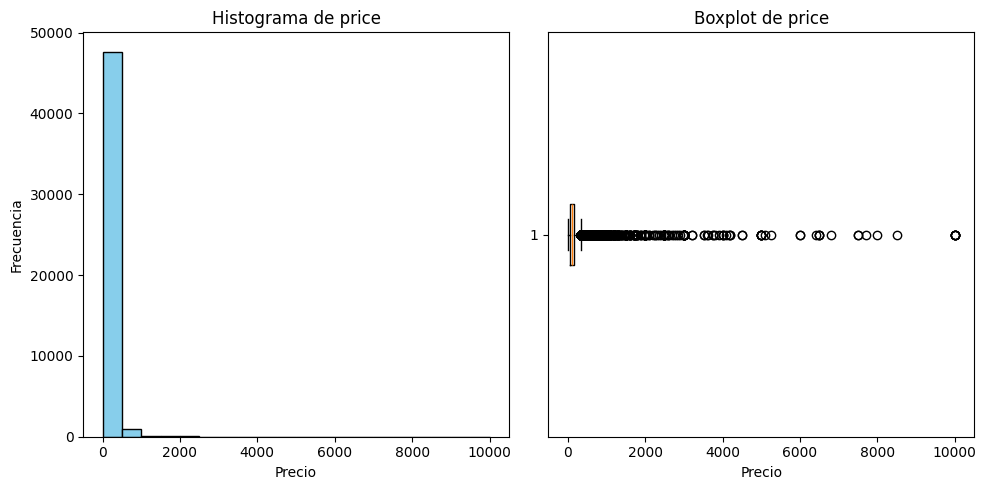

In [248]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(data['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de price')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(data['price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [249]:
#Realizar un log para centrar y estabilizar los valores
#Eliminar los valores con precio 0 para que no sea infinito con log
data = data[data['price'] > 0]
data['Log_Price'] = np.log(data.price)
data['Log_Price'].head()

0    5.003946
1    5.416100
2    5.010635
3    4.488636
4    4.382027
Name: Log_Price, dtype: float64

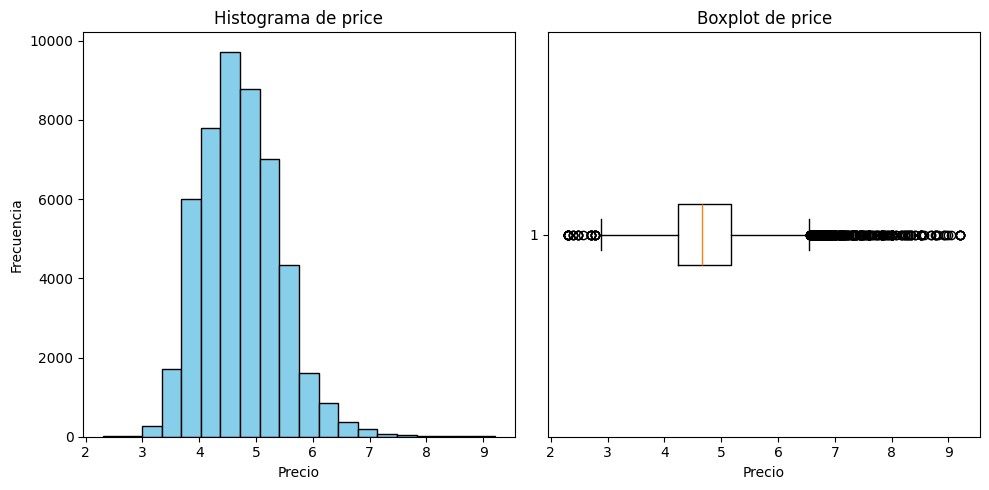

In [250]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(data['Log_Price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de price')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(data['Log_Price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [251]:
#Comprobar las posibles incidencias con valores perdidos
data.isnull().mean()*100

host_id                            0.000000
host_name                          0.042959
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.560920
reviews_per_month                 20.560920
calculated_host_listings_count     0.000000
availability_365                   0.000000
Log_Price                          0.000000
dtype: float64

In [252]:
#comprobamos el porcentaje de valores vacios
data.isnull().any(axis=1).sum()/len(data)*100

np.float64(20.59365027411832)

<Axes: >

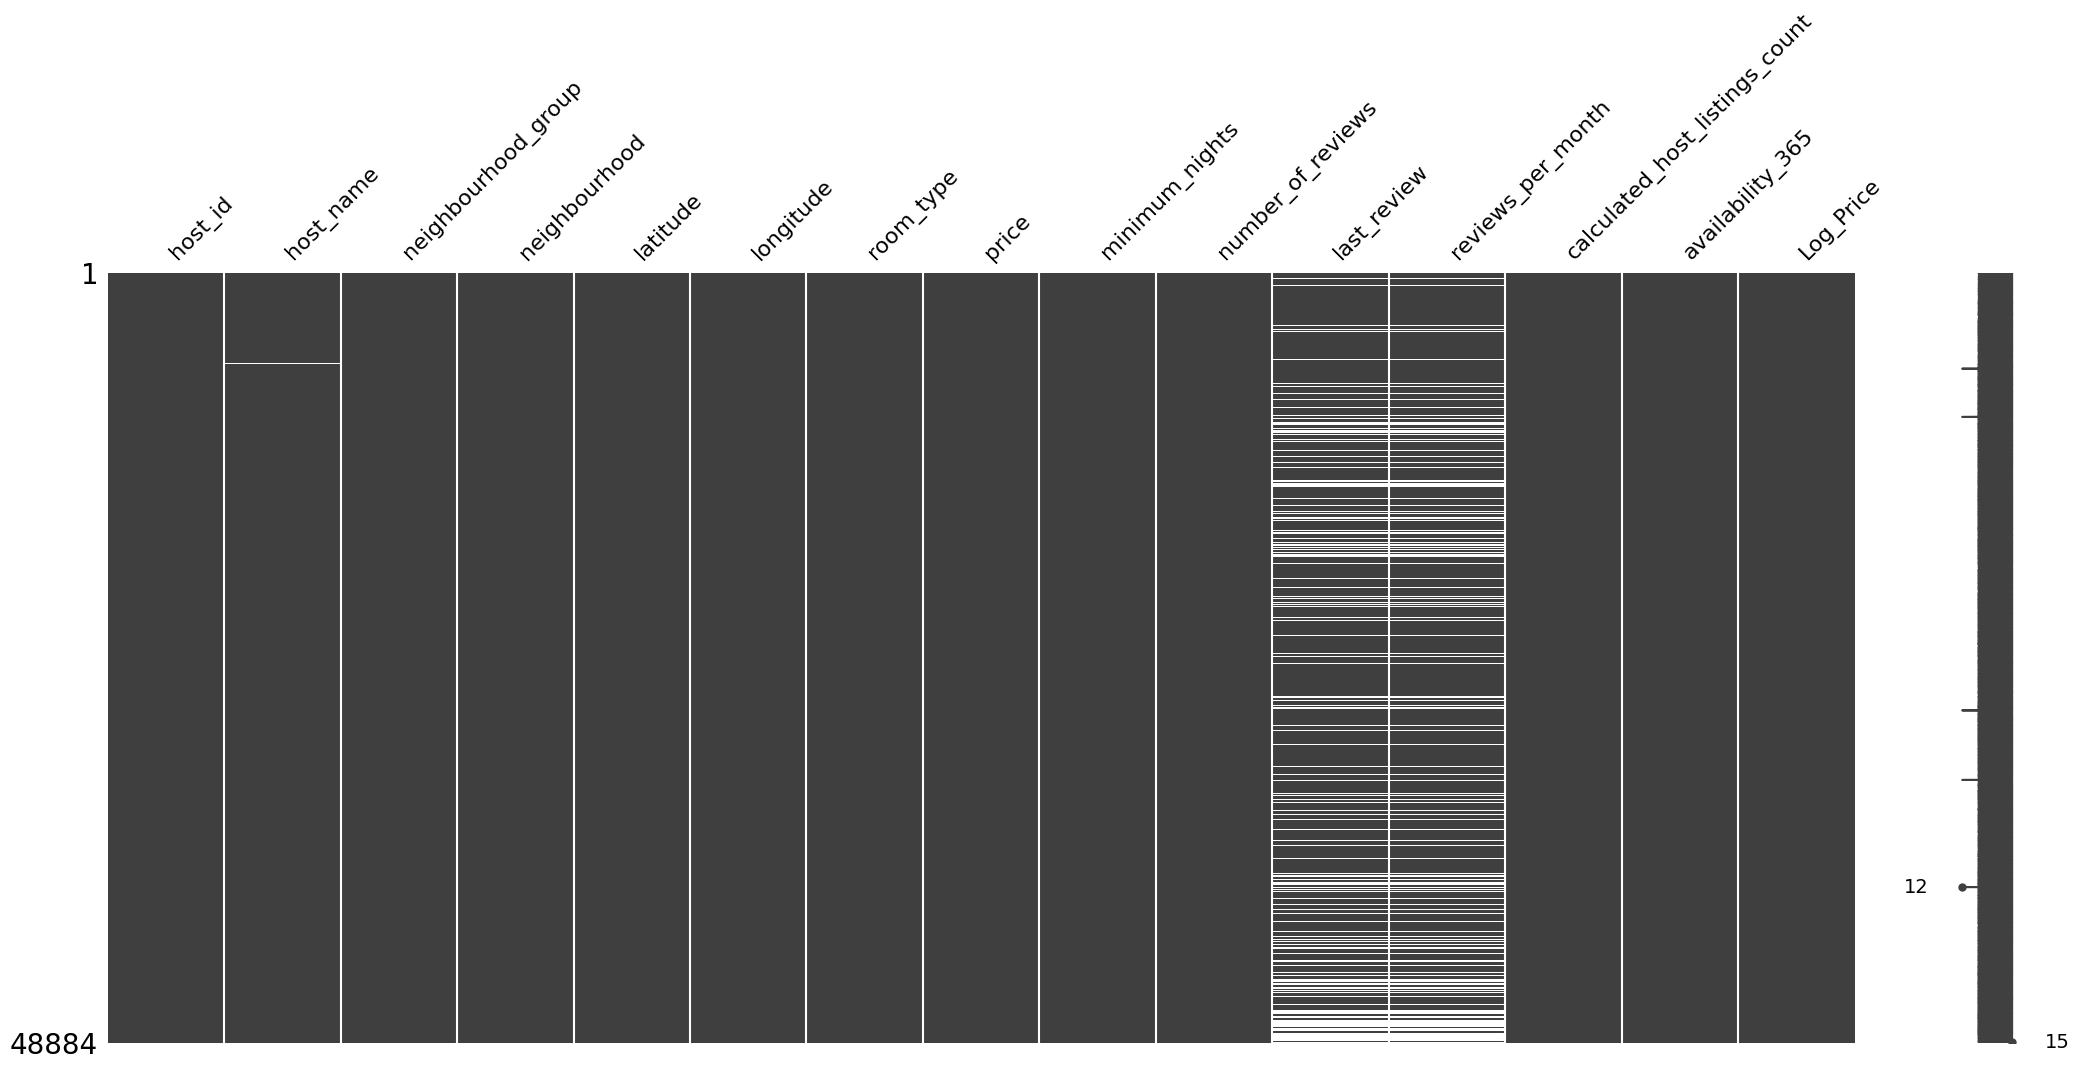

In [253]:
#Comprobaremos la matriz del data frame de los valores nulos
msno.matrix(data)

In [254]:
#Eliminaremos las tablas con almenos un elementos perdidos o nulos, que son:
#'reviews_per_month','last_review', estas dos tiene una correlacion en sus valores
#'host_name' esta tiene un valor nulo, y para evitar conflicto
#Y la columna de precios ya que es la que se desea predecir
data.drop(columns=['host_name','last_review','reviews_per_month','price'], inplace = True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Log_Price
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,6,365,5.003946
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,5.416100
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,1,365,5.010635
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,1,194,4.488636
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,4.382027


In [255]:
#Modificar variables objeto


# Crear el encoder
label_encoder = LabelEncoder()

# Aplicar el encoder a la columna
data['neigh_group_num'] = label_encoder.fit_transform(data['neighbourhood_group'])
data['neigh_num'] = label_encoder.fit_transform(data['neighbourhood'])
data['room_type_num'] = label_encoder.fit_transform(data['room_type'])

In [256]:
#Eliminamos las columnas de objetos, ya que sis datos se han almacenado de manera numerica
#neigh_group_num: 0->Bronx  1->Brooklyn  2->Manhattan 3->Queens	4->
#room_type_num: 0->Entire home/apt  1->Private room  2->Shared room
data.drop(columns=['neighbourhood_group','neighbourhood','room_type'], inplace = True)
data.head()


,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Log_Price,neigh_group_num,neigh_num,room_type_num
0,2787,40.64749,-73.97237,1,9,6,365,5.003946,1,108,1
1,2845,40.75362,-73.98377,1,45,2,355,5.416100,2,127,0
2,4632,40.80902,-73.94190,3,0,1,365,5.010635,2,94,1
3,4869,40.68514,-73.95976,1,270,1,194,4.488636,1,41,0
4,7192,40.79851,-73.94399,10,9,1,0,4.382027,2,61,0


In [257]:
# Variables independientes/dependiente
X = data.drop(['Log_Price'], axis=1)
y = data.Log_Price

# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

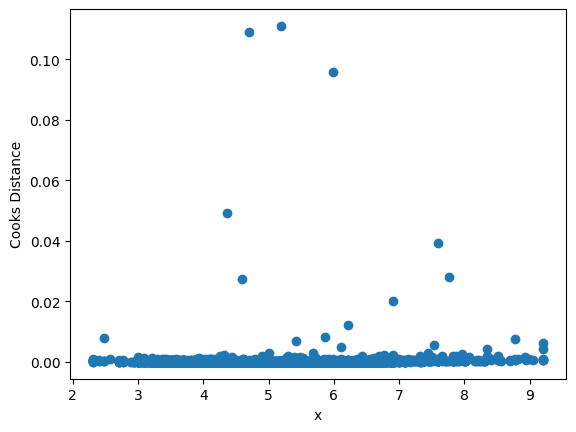

In [258]:
plt.scatter(data.Log_Price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [259]:
# Consultamos la observación más influyente
np.where(cooks_distance[0]>0.1)

(array([ 5767, 38653]),)

In [260]:
#Limpiaremos las filas con mayor influencia
# Si la distancia es mayor de 4/n se considera observación influyente
p = 4/len(X)
len(np.where(cooks_distance[0]>p)[0])/len(X)*100

4.725472547254726

In [261]:
data.shape

(48884, 11)

In [262]:
data.drop(np.where(cooks_distance[0]>p)[0], inplace=True)
data.shape

(46574, 11)

In [264]:
X = data.drop(['Log_Price'], axis=1)
y = data.Log_Price

In [267]:
#crear listas de entrenamineot y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
data_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
data_imp = data_imp.sort_values(by='Importance', ascending=False)
data_imp

,Feature,Importance
9,room_type_num,86.611382
2,longitude,3.141178
1,latitude,2.021660
3,minimum_nights,1.657910
6,availability_365,1.477659
5,calculated_host_listings_count,1.400189
4,number_of_reviews,1.207556
8,neigh_num,0.981265
7,neigh_group_num,0.751865
0,host_id,0.749338


In [272]:
# tomamos como valor minimo 0.90%
data_imp[data_imp.Importance>=1].Feature.values

array(['room_type_num', 'longitude', 'latitude', 'minimum_nights',
       'availability_365', 'calculated_host_listings_count',
       'number_of_reviews'], dtype=object)

In [273]:
X_train = X_train[data_imp[data_imp.Importance>=1].Feature.values]
X_test = X_test[data_imp[data_imp.Importance>=1].Feature.values]

In [276]:
#Si exite una VIF mayor a 10 existiria interferencia entee ellas, como se obserba no pasa de 2
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

room_type_num                     1.211529
longitude                         1.316284
latitude                          1.031576
minimum_nights                    1.360631
availability_365                  1.694573
calculated_host_listings_count    1.517111
number_of_reviews                 1.283885
dtype: float64

In [277]:
#Para verlo con mayor pespectiva se realizara una mtriz de correlaciones
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,room_type_num,longitude,latitude,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,y
room_type_num,1.000,0.186,0.006,-0.085,0.026,-0.104,0.001,-0.640
longitude,0.186,1.000,0.073,-0.077,0.096,-0.114,0.063,-0.346
latitude,0.006,0.073,1.000,0.028,-0.005,0.020,-0.011,0.083
minimum_nights,-0.085,-0.077,0.028,1.000,0.175,0.179,-0.103,0.030
availability_365,0.026,0.096,-0.005,0.175,1.000,0.228,0.178,0.091
calculated_host_listings_count,-0.104,-0.114,0.020,0.179,0.228,1.000,-0.073,0.134
number_of_reviews,0.001,0.063,-0.011,-0.103,0.178,-0.073,1.000,-0.043
y,-0.640,-0.346,0.083,0.030,0.091,0.134,-0.043,1.000


In [282]:
#Crear df con los valores seleccionados de entrenamiento y test, guardarlo
X_train["price"] = list(y_train)
X_test["price"] = list(y_test)
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)